In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [6]:
base_path = r"C:\Users\tiwar\plant_disease_detection\processed_dataset"
train_dir = os.path.join(base_path, "train")
test_dir = os.path.join(base_path, "test")

image_size = (224, 224)
batch_size = 32


In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 25061 images belonging to 85 classes.
Found 6306 images belonging to 85 classes.


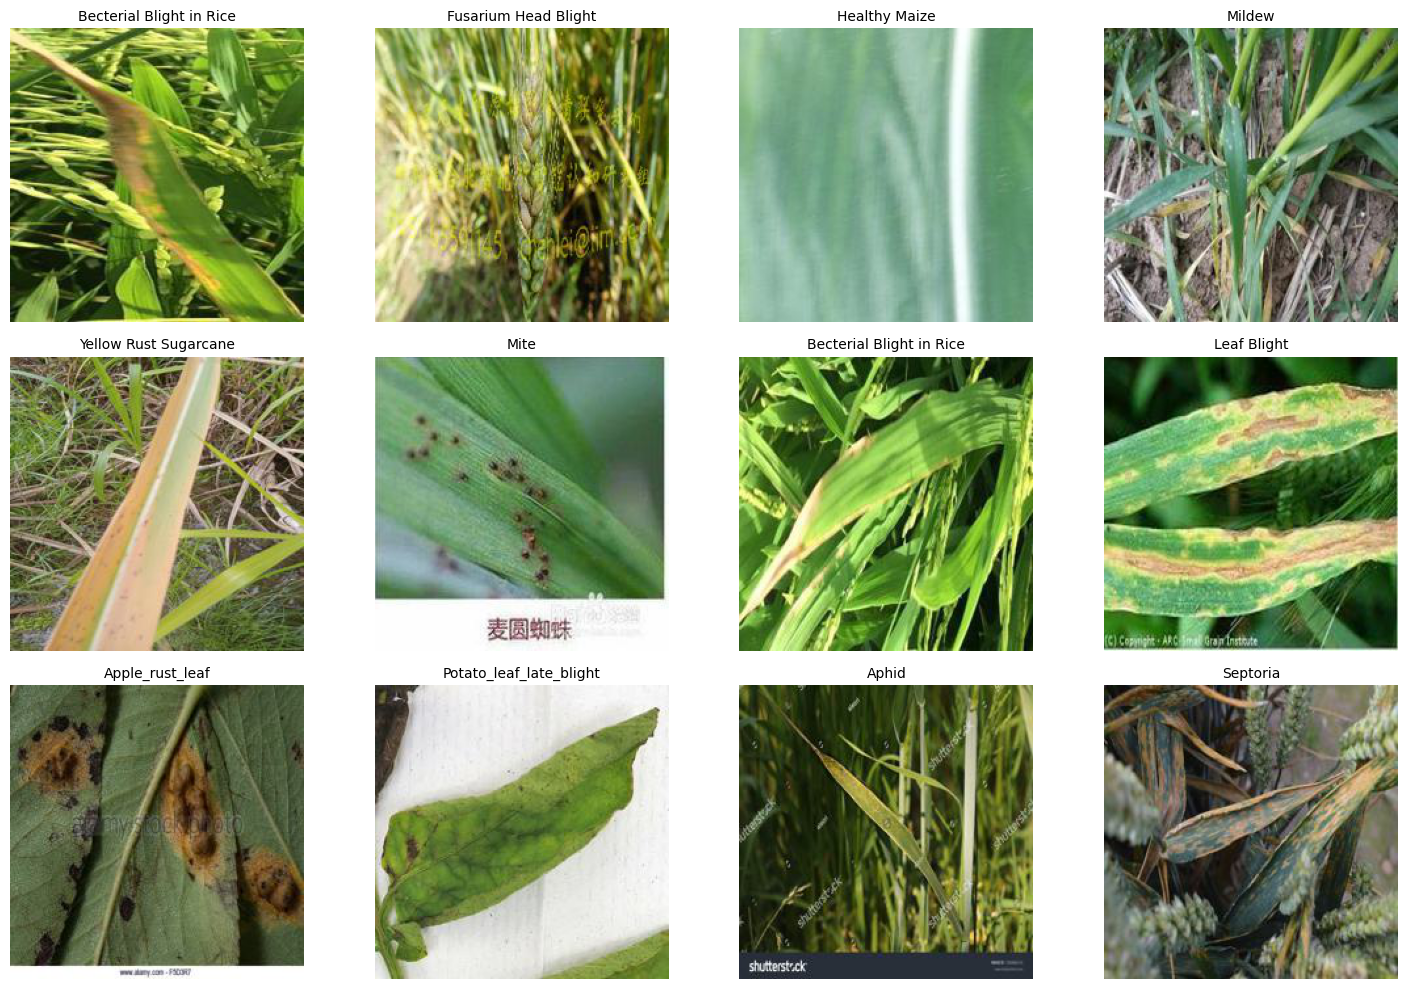

In [8]:
def plot_batch(generator):
    images, labels = next(generator)
    class_names = list(generator.class_indices.keys())
    
    plt.figure(figsize=(15, 10))
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i])
        label_idx = np.argmax(labels[i])
        plt.title(class_names[label_idx], fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# 🔍 Visualize training images
plot_batch(train_generator)
